### Import the Liraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Explorative Data Analysis : EDA

<Axes: ylabel='Density'>

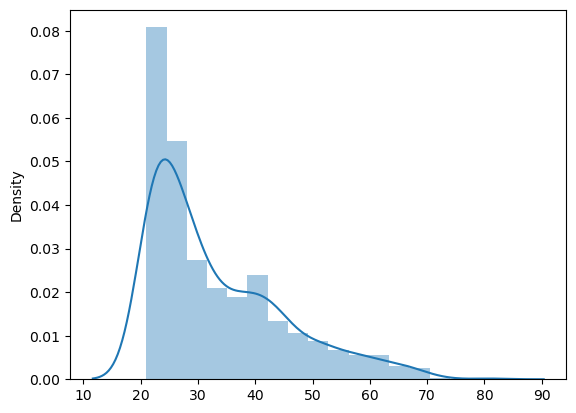

In [6]:
sns.distplot(x= df['Age'])

<Axes: xlabel='BloodPressure', ylabel='Count'>

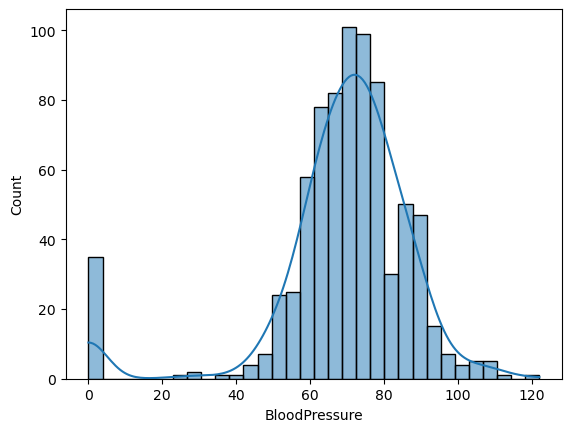

In [7]:
sns.histplot(x= df['BloodPressure'],kde=True)

<Axes: xlabel='Glucose', ylabel='Count'>

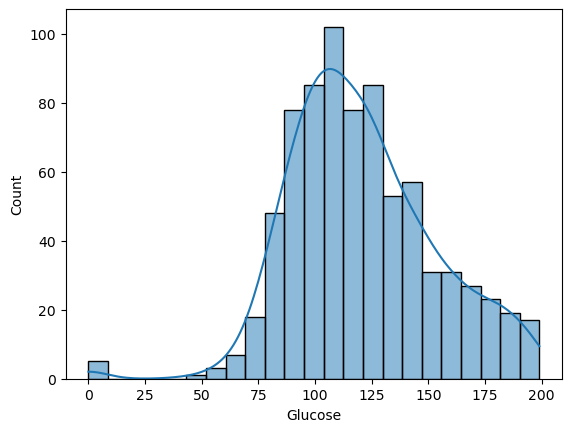

In [8]:
sns.histplot(x= df['Glucose'],kde=True)

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

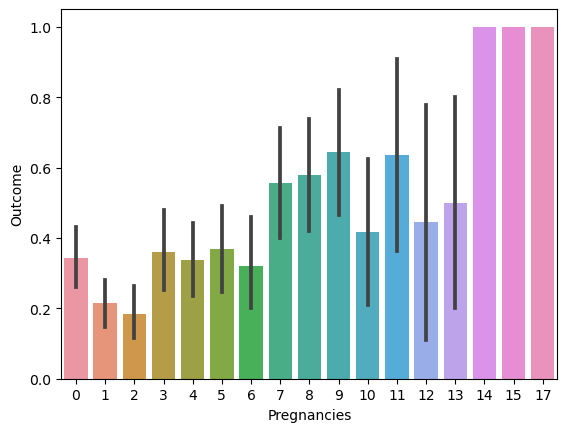

In [9]:
sns.barplot(x= df['Pregnancies'],y=df['Outcome'])

<Axes: >

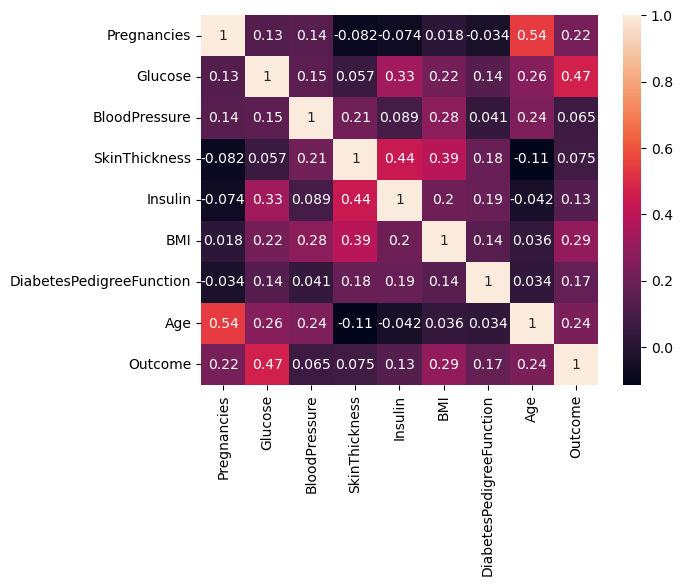

In [10]:
sns.heatmap(df.corr(),annot=True)

### Train Test split

In [11]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

### Feature Scaling

In [12]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_scaled = std.fit_transform(x)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

<IPython.core.display.Javascript object>

### Model Selection

In [14]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
pred = model.predict(x_test)

### Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Accuracy: 0.7792207792207793

Confusion Matrix:
 [[89 10]
 [24 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



### Save the model

In [18]:
import joblib

In [21]:
joblib.dump(model,'diabetes.pkl')
print("model saved successfully")

model saved successfully
